#Необходимые модули

In [175]:
#установка библиотек
!pip install -U lightautoml
!pip install scikit-learn
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
#import необходимых модулей
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.dataset.roles import CategoryRole

# Обработка данных

In [177]:
#Считывание данных в DataFrame
df = pd.read_csv('/content/train_dataset_train.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str, 'PATIENT_ID_COUNT':int})
counts = pd.read_csv('/content/counts.csv')


df

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00.0,Гурьевск,08.21,young,1
1,0,A00.0,Калининград,03.20,children,1
2,0,A00,Гусев,03.19,children,1
3,0,A00,Калининград,01.22,children,1
4,0,A00,Калининград,02.18,children,1
...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,1
2212389,1,Z99.8,Калининград,10.21,young,1
2212390,1,Z99.9,Калининград,04.19,children,2
2212391,1,Z99.9,Калининград,08.19,children,1


In [178]:
#Приводим дату к DateTime
df['VISIT_MONTH_YEAR'] = pd.to_datetime(df['VISIT_MONTH_YEAR'], format='%m.%y')
df

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00.0,Гурьевск,2021-08-01,young,1
1,0,A00.0,Калининград,2020-03-01,children,1
2,0,A00,Гусев,2019-03-01,children,1
3,0,A00,Калининград,2022-01-01,children,1
4,0,A00,Калининград,2018-02-01,children,1
...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,2021-12-01,children,1
2212389,1,Z99.8,Калининград,2021-10-01,young,1
2212390,1,Z99.9,Калининград,2019-04-01,children,2
2212391,1,Z99.9,Калининград,2019-08-01,children,1


In [179]:
#Преведение данных к временным рядам
df.rename(columns={'PATIENT_ID_COUNT': 'PIC'}, inplace=True)
ts = df.pivot_table(index=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'],
                            columns=['VISIT_MONTH_YEAR'],
                            values=['PIC'],
                            aggfunc='sum',
                            fill_value=0)
ts = ts.reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0)
ts.columns = ["".join(str(a)) for a in ts.columns.to_flat_index()]
ts.rename(columns={"('AGE_CATEGORY', '')": 'AGE_CATEGORY',
                   "('ADRES', '')": 'ADRES',
                   "('MKB_CODE', '')": 'MKB_CODE',
                   "('PATIENT_SEX', '')": 'PATIENT_SEX',
                   }, inplace=True)
ts

,AGE_CATEGORY,ADRES,MKB_CODE,PATIENT_SEX,"('PIC', Timestamp('2018-01-01 00:00:00'))","('PIC', Timestamp('2018-02-01 00:00:00'))","('PIC', Timestamp('2018-03-01 00:00:00'))","('PIC', Timestamp('2018-04-01 00:00:00'))","('PIC', Timestamp('2018-05-01 00:00:00'))","('PIC', Timestamp('2018-06-01 00:00:00'))",...,"('PIC', Timestamp('2021-06-01 00:00:00'))","('PIC', Timestamp('2021-07-01 00:00:00'))","('PIC', Timestamp('2021-08-01 00:00:00'))","('PIC', Timestamp('2021-09-01 00:00:00'))","('PIC', Timestamp('2021-10-01 00:00:00'))","('PIC', Timestamp('2021-11-01 00:00:00'))","('PIC', Timestamp('2021-12-01 00:00:00'))","('PIC', Timestamp('2022-01-01 00:00:00'))","('PIC', Timestamp('2022-02-01 00:00:00'))","('PIC', Timestamp('2022-03-01 00:00:00'))"
0,children,Гусев,A00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,children,Калининград,A00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
2,elderly,Калининград,A00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,middleage,Калининград,A00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,old,Калининград,A00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406330,elderly,Черняховск,Z98.8,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
406331,young,Янтарный,Z98.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406332,children,Гурьевск,Z99.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
406333,young,Калининград,Z99.8,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [180]:
#Добавлене данных о численности населения
ts = ts.merge(counts, on='ADRES')
ts = ts.set_index('COUNT').reset_index(level=0)
ts.drop(columns=['Unnamed: 0'], inplace=True)

In [181]:
#Смена имен колонок для корректной работы модели
ts.columns = list(map(str, range(len(ts.columns))))

In [182]:
ts

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,249,children,Гусев,A00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249,children,Гусев,A02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,249,middleage,Гусев,A02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,249,young,Гусев,A02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,249,children,Гусев,A02.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223730,5,children,СТ Чайка,Z71.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223731,5,young,СТ Чайка,Z71.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223732,5,elderly,СТ Чайка,Z76.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223733,5,middleage,СТ Чайка,Z76.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Обучение модели

In [183]:
#Настройка параметров модели
task = Task(name = "reg",
        metric = r2_score,
        greater_is_better=True
        )

roles = {'target': '55', 
         CategoryRole() : '1',
         CategoryRole() : '2',
         CategoryRole() : '3',
         CategoryRole() : '4',
         }

 
TEST_SIZE = 0.2
N_THREADS = 4 

#Фиксирование random state
RANDOM_STATE = 42
reader_params = { 'random_state': RANDOM_STATE}

In [184]:
#Обучение модели
automl = TabularAutoML(task = task,                       
                        cpu_limit = N_THREADS,
                        reader_params = {'n_jobs': N_THREADS, 'random_state': RANDOM_STATE},
                        general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned', 'cb','cb_tuned']]}, 
                       timeout=3600*8)
oof_pred = automl.fit_predict(ts, roles=roles)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 28800.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (223735, 56)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 28783.99 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [63, 64, 65], 'embed_sizes': array([26,  7,  3], dtype=int32), 'data_size': 66}
I

#Формирование solution для отправки на платформу

In [185]:
#Загрузка тестовой части в DataFrame 
test_sol = pd.read_csv('/content/test_dataset_test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [186]:
#Предсказание модели на тестовых данных
ts = ts.drop(columns=["5"])
ts.columns = list(map(str, range(len(ts.columns))))
y_pred = automl.predict(ts).data

#Последующая обработка предсказания модели

In [187]:
#Добовление предсказания к остальным значениям
ts['PATIENT_ID_COUNT'] = y_pred

In [188]:
#Возвращение имен колонок
ts.rename(columns={'1': 'AGE_CATEGORY',
                   '2': 'ADRES',
                   '3': 'MKB_CODE',
                   '4': 'PATIENT_SEX',
                   }, inplace=True)

#Возвращение даты
ts['VISIT_MONTH_YEAR'] = '04.22'

In [189]:
#Удаление временных колонок
ts.drop(columns=list(map(str, range(5, 55))), inplace=True)
ts.drop(columns=['0'], inplace=True)

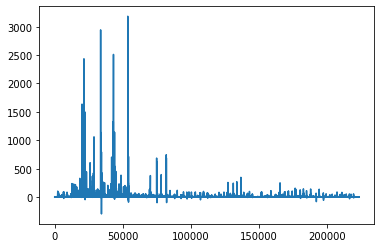

In [190]:
ts['PATIENT_ID_COUNT'].plot()

In [191]:
#Обработка предсказания модели
ts['PATIENT_ID_COUNT'] = ts['PATIENT_ID_COUNT'].abs().apply(round)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


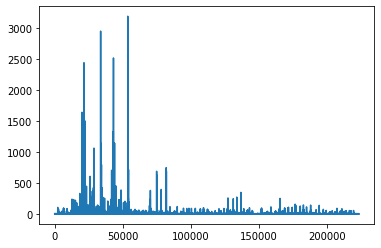

In [192]:
ts['PATIENT_ID_COUNT'].plot()

In [193]:
#Сохранение предсказаний
sol = test_sol.merge(ts, on=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY', 'VISIT_MONTH_YEAR'], how='left').fillna(0)
sol['PATIENT_ID_COUNT'] = sol['PATIENT_ID_COUNT'].astype(int)

In [194]:
#Сохраняем в csv файл
sol.to_csv('solution.csv', sep=';', index=None)